In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns

basePath='A:\Git\Logistic_Regression\Titanic_survival'
trainDataFilePath = basePath+'/train.csv'
testDataFilePath = basePath+'/test.csv'

train = pd.read_csv(trainDataFilePath)
test = pd.read_csv(testDataFilePath)

In [2]:
# VARIABLE DESCRIPTIONS:
# survival        Survival
#                 (0 = No; 1 = Yes)
# pclass          Passenger Class
#                 (1 = 1st; 2 = 2nd; 3 = 3rd)
# name            Name
# sex             Sex
# age             Age
# sibsp           Number of Siblings/Spouses Aboard
# parch           Number of Parents/Children Aboard
# ticket          Ticket Number
# fare            Passenger Fare
# cabin           Cabin
# embarked        Port of Embarkation
#                 (C = Cherbourg; Q = Queenstown; S = Southampton)

In [3]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
train.count()

PassengerId    891
Survived       891
Pclass         891
Name           891
Sex            891
Age            714
SibSp          891
Parch          891
Ticket         891
Fare           891
Cabin          204
Embarked       889
dtype: int64

#Check Survived Percentage

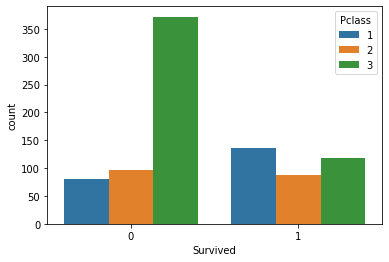

In [5]:
sns.countplot(x='Survived', hue='Pclass', data=train)

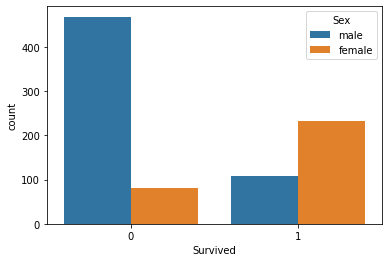

In [6]:
sns.countplot(x='Survived', hue='Sex', data=train)

In [7]:
#Look at survival rate by sex
train.groupby('Sex')[['Survived']].mean()

,Survived
Sex,
female,0.742038
male,0.188908


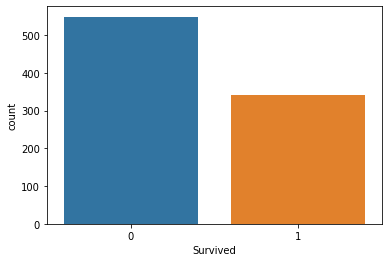

In [8]:
sns.countplot(train['Survived'],label="Count")

In [9]:
#handling outliers
# Detect outliers in the continuous columns

cols = list(train)
outliers = pd.DataFrame(columns=['Feature', 'Number of Outliers'])

for column in cols:  # Iterate through each feature
    if column in train.select_dtypes(include=np.number).columns:
        q1 = train[column].quantile(0.25)
        q3 = train[column].quantile(0.75)
        iqr = q3 - q1
        fence_low = q1 - (1.5 * iqr)
        fence_high = q3 + (1.5 * iqr)

        # finding the number of outliers using 'and(|) condition.
        total_outlier = train[(train[column] < fence_low) |
                                  (train[column] > fence_high)].shape[0]
        outliers = outliers.append(
            {
                'Feature': column,
                'Number of Outliers': total_outlier
            },
            ignore_index=True)
outliers

,Feature,Number of Outliers
0,PassengerId,0
1,Survived,0
2,Pclass,0
3,Age,11
4,SibSp,46
5,Parch,213
6,Fare,116


In [10]:
#Handling missing values

In [11]:
train.isna().sum()


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [12]:
(train.isnull().sum()/train.isnull().count()*100).sort_values(ascending = False)

Cabin          77.104377
Age            19.865320
Embarked        0.224467
Fare            0.000000
Ticket          0.000000
Parch           0.000000
SibSp           0.000000
Sex             0.000000
Name            0.000000
Pclass          0.000000
Survived        0.000000
PassengerId     0.000000
dtype: float64

In [13]:
train.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [14]:
#Handling missing values for cabin by classifying into numerical value based on categories
import re
deck = {"A": 1, "B": 2, "C": 3, "D": 4, "E": 5, "F": 6, "G": 7, "U": 8}
data = [train, test]

for dataset in data:
    dataset['Cabin'] = dataset['Cabin'].fillna("U0")
    dataset['Deck'] = dataset['Cabin'].map(lambda x: re.compile("([a-zA-Z]+)").search(x).group())
    dataset['Deck'] = dataset['Deck'].map(deck)
    dataset['Deck'] = dataset['Deck'].fillna(0)
    dataset['Deck'] = dataset['Deck'].astype(int)

In [15]:
train.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Deck
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,U0,S,8
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,3
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,U0,S,8
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,3
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,U0,S,8
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,U0,Q,8
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,5
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,U0,S,8
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,U0,S,8
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,U0,C,8


In [16]:
# we can now drop the cabin feature
train = train.drop(['Cabin'], axis=1)
test = test.drop(['Cabin'], axis=1)

In [17]:
train.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Deck
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,8
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,3
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,8
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,3
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,8
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,Q,8
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,S,5
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,S,8
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,S,8
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,C,8


In [18]:
#Replace missing age with median
train["Age"] = train["Age"].fillna(train["Age"].median())

test["Age"] = test["Age"].fillna(test["Age"].median())

In [19]:
#Impute the missing values with most common value

train["Embarked"] = train ["Embarked"].fillna("S")


test["Embarked"] = test["Embarked"].fillna("S")

In [20]:
train.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
Deck           0
dtype: int64

In [21]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Deck
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,8
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,3
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,8
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,3
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,8


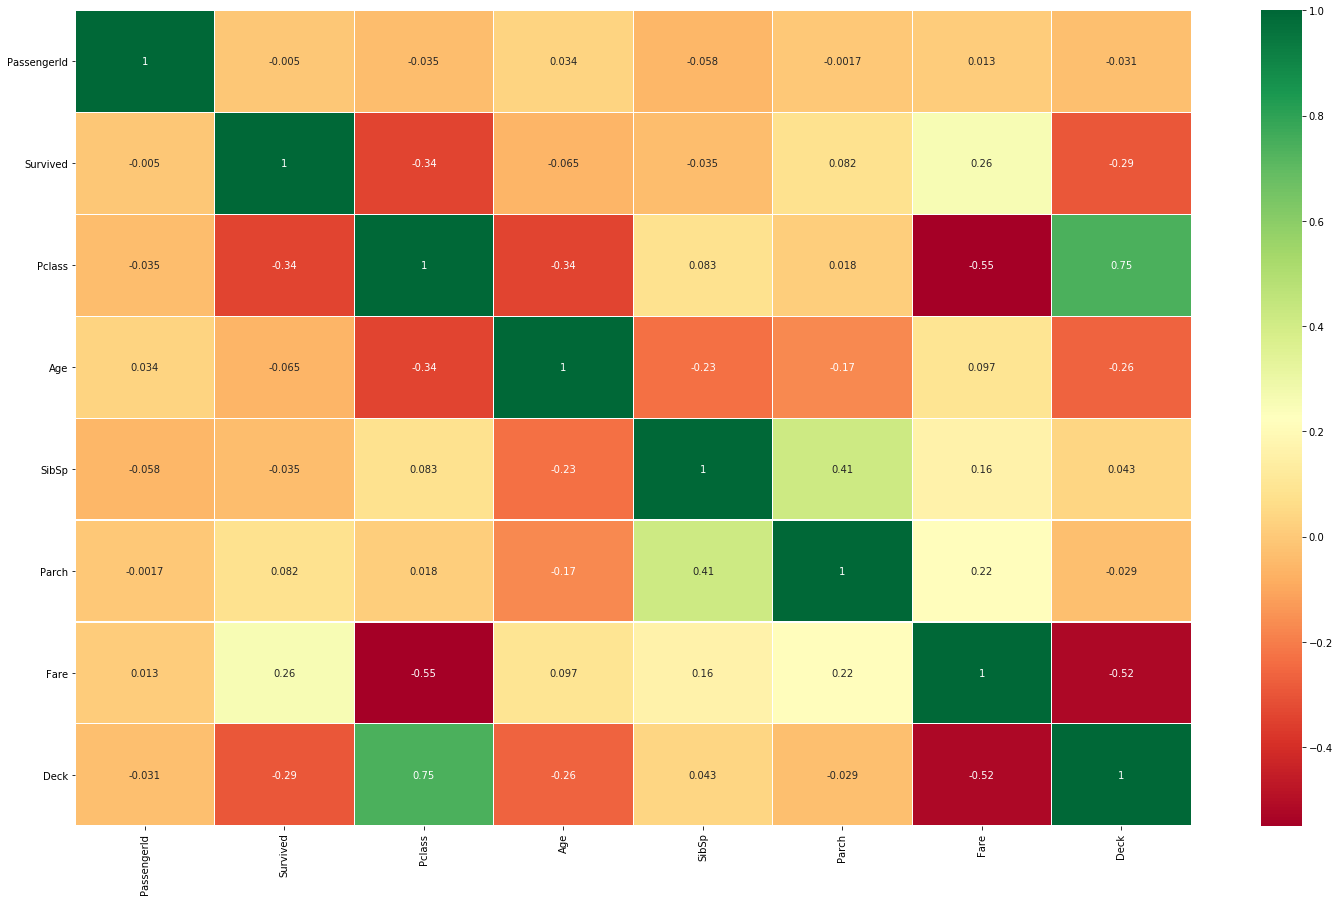

In [22]:
#1.After filling all the missing data now. check correlation matrix using the seaborn heatmap
sns.heatmap(train.corr(),annot=True,cmap='RdYlGn',linewidths=0.2) #data.corr()-->correlation matrix
fig=plt.gcf()
fig.set_size_inches(25,15)
plt.show()

In [23]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    object 
 11  Deck         891 non-null    int32  
dtypes: float64(2), int32(1), int64(5), object(4)
memory usage: 80.2+ KB


In [24]:
train["Sex"].unique()

array(['male', 'female'], dtype=object)

In [25]:
#Convert the categorical variables into integers

train["Sex"][train["Sex"] == "male"] = 0
train["Sex"][train["Sex"] == "female"] = 1

test["Sex"][test["Sex"] == "male"] = 0
test["Sex"][test["Sex"] == "female"] = 1

C:\Users\AKSHANSH\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\AKSHANSH\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\Users\AKSHANSH\anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ret

In [26]:
train["Sex"].unique()

array([0, 1], dtype=object)

In [27]:
from sklearn.preprocessing import OneHotEncoder
# creating instance of one-hot-encoder
enc = OneHotEncoder(handle_unknown='ignore')
# passing bridge-types-cat column (label encoded values of bridge_types)
enc_df = pd.DataFrame(enc.fit_transform(train[['Embarked']]).toarray(),columns=['S', 'C', 'Q'])
# merge with main df bridge_df on key values
train = train.join(enc_df)
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Deck,S,C,Q
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,S,8,0.0,0.0,1.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C,3,1.0,0.0,0.0
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,S,8,0.0,0.0,1.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,S,3,0.0,0.0,1.0
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,S,8,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",0,27.0,0,0,211536,13.0000,S,8,0.0,0.0,1.0
887,888,1,1,"Graham, Miss. Margaret Edith",1,19.0,0,0,112053,30.0000,S,2,0.0,0.0,1.0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",1,28.0,1,2,W./C. 6607,23.4500,S,8,0.0,0.0,1.0
889,890,1,1,"Behr, Mr. Karl Howell",0,26.0,0,0,111369,30.0000,C,3,1.0,0.0,0.0


In [28]:
train.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
Deck           0
S              0
C              0
Q              0
dtype: int64

In [29]:
#Converting age to age group
data = [train, test]
for dataset in data:
    dataset['Age'] = dataset['Age'].astype(int)
    dataset.loc[ dataset['Age'] <= 11, 'Age'] = 0
    dataset.loc[(dataset['Age'] > 11) & (dataset['Age'] <= 18), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 18) & (dataset['Age'] <= 22), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 22) & (dataset['Age'] <= 27), 'Age'] = 3
    dataset.loc[(dataset['Age'] > 27) & (dataset['Age'] <= 33), 'Age'] = 4
    dataset.loc[(dataset['Age'] > 33) & (dataset['Age'] <= 40), 'Age'] = 5
    dataset.loc[(dataset['Age'] > 40) & (dataset['Age'] <= 66), 'Age'] = 6
    dataset.loc[ dataset['Age'] > 66, 'Age'] = 6

In [30]:
train.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Deck,S,C,Q
0,1,0,3,"Braund, Mr. Owen Harris",0,2,1,0,A/5 21171,7.2500,S,8,0.0,0.0,1.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,5,1,0,PC 17599,71.2833,C,3,1.0,0.0,0.0
2,3,1,3,"Heikkinen, Miss. Laina",1,3,0,0,STON/O2. 3101282,7.9250,S,8,0.0,0.0,1.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,5,1,0,113803,53.1000,S,3,0.0,0.0,1.0
4,5,0,3,"Allen, Mr. William Henry",0,5,0,0,373450,8.0500,S,8,0.0,0.0,1.0
5,6,0,3,"Moran, Mr. James",0,4,0,0,330877,8.4583,Q,8,0.0,1.0,0.0
6,7,0,1,"McCarthy, Mr. Timothy J",0,6,0,0,17463,51.8625,S,5,0.0,0.0,1.0
7,8,0,3,"Palsson, Master. Gosta Leonard",0,0,3,1,349909,21.0750,S,8,0.0,0.0,1.0
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",1,3,0,2,347742,11.1333,S,8,0.0,0.0,1.0
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",1,1,1,0,237736,30.0708,C,8,1.0,0.0,0.0


In [31]:
#dropping irrelevant features
train = train.drop(["PassengerId","Name","Ticket"], axis=1)
test = test.drop(["PassengerId","Name","Ticket"], axis=1)



In [32]:
train = train.drop(["Embarked"], axis=1)
test = test.drop(["Embarked"], axis=1)

In [33]:
#Scaling the numerical data:
from sklearn.preprocessing import StandardScaler
#train_numerical_features = list(train.select_dtypes(include=['int64', 'float64', 'int32']).columns)
ss_scaler = StandardScaler()
#train_df_ss = pd.DataFrame(data = train)
train[[ "Fare"]] = ss_scaler.fit_transform(train[["Fare"]])

In [34]:
train.head(10)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Deck,S,C,Q
0,0,3,0,2,1,0,-0.502445,8,0.0,0.0,1.0
1,1,1,1,5,1,0,0.786845,3,1.0,0.0,0.0
2,1,3,1,3,0,0,-0.488854,8,0.0,0.0,1.0
3,1,1,1,5,1,0,0.420730,3,0.0,0.0,1.0
4,0,3,0,5,0,0,-0.486337,8,0.0,0.0,1.0
5,0,3,0,4,0,0,-0.478116,8,0.0,1.0,0.0
6,0,1,0,6,0,0,0.395814,5,0.0,0.0,1.0
7,0,3,0,0,3,1,-0.224083,8,0.0,0.0,1.0
8,1,3,1,3,0,2,-0.424256,8,0.0,0.0,1.0
9,1,2,1,1,1,0,-0.042956,8,1.0,0.0,0.0


In [35]:
#Now all values have numerical equivalent
train.iloc[:,1:11]
train.iloc[:,0:1]

,Survived
0,0
1,1
2,1
3,1
4,0
...,...
886,0
887,1
888,0
889,1


In [36]:
#selecting best features
X = train.iloc[:,1:11]  #independent columns
y = train.iloc[:,0:1]    #target column i.e price range
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
rfe = RFE(model, 8)
fit = rfe.fit(X, y)
print("Num Features: %s" % (fit.n_features_))
print("Selected Features: %s" % (fit.support_))
print('Selected features: %s' % list(X.columns[rfe.support_]))
print("Feature Ranking: %s" % (fit.ranking_))

Num Features: 8
Selected Features: [ True  True  True  True False  True False  True  True  True]
Selected features: ['Pclass', 'Sex', 'Age', 'SibSp', 'Fare', 'S', 'C', 'Q']
Feature Ranking: [1 1 1 1 2 1 3 1 1 1]


C:\Users\AKSHANSH\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [37]:
#import logistic regression
from sklearn.linear_model import LogisticRegression # Logistic Regression
from sklearn.model_selection import train_test_split #for split the data
from sklearn.metrics import accuracy_score #for accuracy_score
from sklearn.metrics import confusion_matrix #for confusion matrix
from sklearn.model_selection import KFold #for K-fold cross validation
from sklearn.model_selection import cross_val_score #score evaluation
from sklearn.model_selection import cross_val_predict #prediction

In [38]:
from sklearn.linear_model import LogisticRegression


Y_target = train["Survived"].values
X_features_one = train[['Pclass', 'Sex', 'Age', 'SibSp', 'Fare', 'S', 'C', 'Q']].values
                               
logistic_model = LogisticRegression()
logistic_model.fit(X_features_one, Y_target)

# Print the Models Coefficients
print(logistic_model.coef_)
logistic_model.score(X_features_one, Y_target)

[[-1.03203189  2.58836032 -0.25000342 -0.33116914  0.0933421   0.12515397
   0.15182746 -0.27734597]]


0.8058361391694725

In [39]:
# Make predictions
y_preds = logistic_model.predict(X = X_features_one)

# Generate table of predictions vs actual
pd.crosstab(y_preds,train["Survived"])

Survived,0,1
row_0,,
0,481,105
1,68,237


In [40]:
from sklearn.metrics import log_loss
log_loss(y_true=train["Survived"],y_pred=y_preds)


6.706243197468914

In [41]:
from sklearn.metrics import accuracy_score
accuracy_score(y_true=train["Survived"],y_pred=y_preds)

0.8058361391694725

In [42]:
from sklearn import metrics 

# View confusion matrix
metrics.confusion_matrix(y_true=train["Survived"],  # True labels
                         y_pred=y_preds) # Predicted labels

array([[481,  68],
       [105, 237]], dtype=int64)

array([[481,  68],
       [105, 237]], dtype=int64)

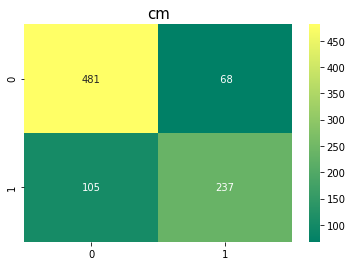

In [43]:
from sklearn import metrics
cm = confusion_matrix(y_true=train["Survived"],y_pred=y_preds)
#visualize confusion matrix 
sns.heatmap(confusion_matrix(train["Survived"],y_preds),annot=True,fmt='3.0f',cmap="summer")
plt.title('cm', y=1.05, size=15)
cm

In [44]:
# View summary of common classification metrics
print(metrics.classification_report(y_true=train["Survived"],
                              y_pred=y_preds) )

              precision    recall  f1-score   support

           0       0.82      0.88      0.85       549
           1       0.78      0.69      0.73       342

    accuracy                           0.81       891
   macro avg       0.80      0.78      0.79       891
weighted avg       0.80      0.81      0.80       891



# Precision Recall Curve

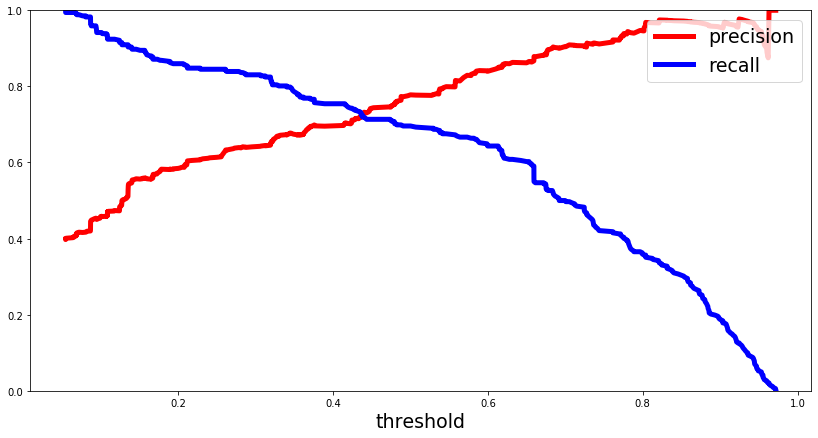

In [45]:
from sklearn.metrics import precision_recall_curve

# getting the probabilities of our predictions
y_scores = logistic_model.predict_proba(X = X_features_one)
y_scores = y_scores[:,1]

precision, recall, threshold = precision_recall_curve(train["Survived"], y_scores)
def plot_precision_and_recall(precision, recall, threshold):
    plt.plot(threshold, precision[:-1], "r-", label="precision", linewidth=5)
    plt.plot(threshold, recall[:-1], "b", label="recall", linewidth=5)
    plt.xlabel("threshold", fontsize=19)
    plt.legend(loc="upper right", fontsize=19)
    plt.ylim([0, 1])

plt.figure(figsize=(14, 7))
plot_precision_and_recall(precision, recall, threshold)
plt.show()

Above you can clearly see that the recall is falling of rapidly at a precision of around 80%. 
Because of that we may want to select the precision/recall tradeoff before that — maybe at around 75 %.
By looking at the plots we need a threshold of around 0.4

Another way to evaluate and compare your binary classifier is provided by the ROC AUC Curve. 
This curve plots the true positive rate (also called recall) against the false positive rate (ratio of incorrectly classified negative instances)

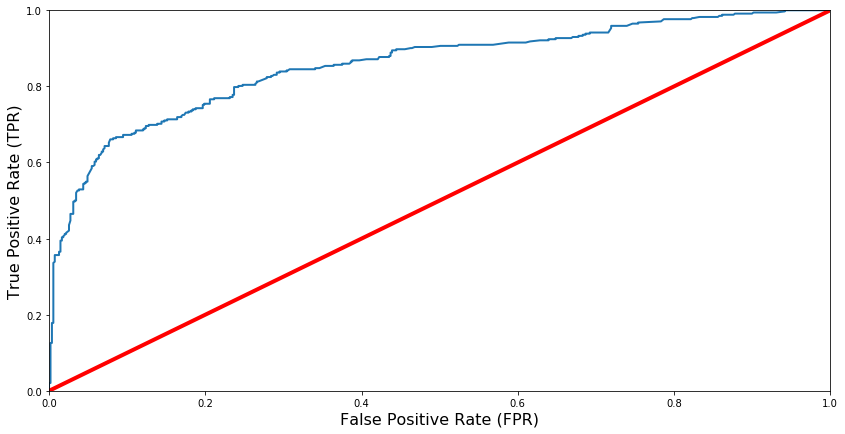

In [46]:
from sklearn.metrics import roc_curve
# compute true positive rate and false positive rate
false_positive_rate, true_positive_rate, thresholds = roc_curve(train["Survived"], y_scores)
# plotting them against each other
def plot_roc_curve(false_positive_rate, true_positive_rate, label=None):
    plt.plot(false_positive_rate, true_positive_rate, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'r', linewidth=4)
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate (FPR)', fontsize=16)
    plt.ylabel('True Positive Rate (TPR)', fontsize=16)

plt.figure(figsize=(14, 7))
plot_roc_curve(false_positive_rate, true_positive_rate)
plt.show()

The ROC AUC Score is the corresponding score to the ROC AUC Curve. It is simply computed by measuring the area under the curve, which is called AUC.

In [47]:
from sklearn.metrics import roc_auc_score
r_a_score = roc_auc_score(train["Survived"], y_scores)
print("ROC-AUC-Score:", r_a_score)

ROC-AUC-Score: 0.8557984213721919
